In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('combined_data_20211217.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (36,37,38,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
topics = pd.read_csv('features/partner_data/GDI/GDI_Domain_Topics_Traffic_December2021.csv')

In [4]:
topics

,domain_name,narrative_density,topics,monthly_pageviews
0,100777.com,"[Decimal('0.183'), Decimal('0.765'), Decimal('...","['antivaxx', 'voterfraud', 'antilgbt', 'pseudo...","10,000"
1,100percentfedup.com,"[Decimal('0.354'), Decimal('0.686'), Decimal('...","['votinglaws', 'voterfraud', 'antiimmigrant', ...","4,110,000"
2,12minutos.com,[None],[None],"610,000"
3,2020conservative.com,"[Decimal('0.946'), Decimal('0.474')]","['voterfraud', 'biden']","310,000"
4,2020dirtsheet.com,"[Decimal('0.705'), Decimal('0.687'), Decimal('...","['voterfraud', 'biden', 'coronavirus']",0
...,...,...,...,...
1392,zelfzorgcovid19.nl,[None],[None],"410,000"
1393,zerohedge.com,"[Decimal('0.133'), Decimal('0.658'), Decimal('...","['antilatinx', 'whitesupremacy', 'coronavirus'...","108,050,000"
1394,zigforums.com,"[Decimal('0.639'), Decimal('0.812'), Decimal('...","['whitesupremacy', 'voterfraud', 'antiasian', ...","20,000"
1395,zionica.com,"[Decimal('0.929'), Decimal('0.648'), Decimal('...","['bigtech', 'whitesupremacy', 'biden', 'corona...",0


In [5]:
data.head()

,Unnamed: 0,date,headline,message_x,link,domain,rating,orientation,sourceEchochamber,actualangryCount,...,antilgbt,antivaxx,voterfraud,coronavirus,qanon,votinglaws,antiimmigrant,antimuslim,antiasian,bigtech
0,0,2020-10-27 16:21:00,"The balls on this guy, huh?",NaN,https://www.tmz.com/2020/10/27/arizona-racist-...,tmz.com,N,NaN,Liberal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2020-08-20 14:34:00,Lindell has come under fire for promoting pote...,En Serio?,https://www.forbes.com/sites/andrewsolender/20...,forbes.com,T,NaN,Liberal,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2020-11-17 15:35:00,Biden has told aides that he's concerned that ...,Wary ?? Wary ?? More like he is worried that t...,https://www.msn.com/en-us/news/politics/presid...,msn.com,T,NaN,Conservative,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021-03-03 03:19:00,The response was a remarkable moment at a pivo...,NaN,https://www.nbcnews.com/politics/elections/sup...,nbcnews.com,T,NaN,Liberal,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2020-08-30 16:26:00,Astronaut Jeanette Epps is the first Black wom...,NaN,https://newsone.com/4005134/nasa-astronaut-jea...,newsone.com,T,Slightly Left,Liberal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
sub_data = data.loc[:,['rating','domain','biden', 'pseudoscience', 
                       'misogyny', 'climatedenial','antilatinx', 
                       '5g', 'whitesupremacy', 'antiblack', 
                       'aliens','antisemitic', 'antilgbt', 
                       'antivaxx', 'voterfraud', 'coronavirus',
                       'qanon', 'votinglaws', 'antiimmigrant', 
                       'antimuslim', 'antiasian','bigtech']]

In [7]:
sub_data_selected = sub_data.loc[sub_data['domain'].isin(list(topics['domain_name'].values)),:]

In [8]:
sub_data_selected

,rating,domain,biden,pseudoscience,misogyny,climatedenial,antilatinx,5g,whitesupremacy,antiblack,...,antilgbt,antivaxx,voterfraud,coronavirus,qanon,votinglaws,antiimmigrant,antimuslim,antiasian,bigtech
5,T,westernjournal.com,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
7,N,theepochtimes.com,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
12,N,bongino.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,T,politicalflare.com,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
15,N,breitbart.com,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
911700,T,nationalreview.com,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
911709,N,polinews.org,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
911725,N,polinews.org,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
911747,N,polinews.org,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
link_topic_count = sub_data_selected.drop('domain',axis=1).groupby('rating').sum()

In [10]:
link_topic_row_count = sub_data_selected.drop('domain',axis=1).groupby('rating').count()

In [11]:
link_topic_row_count

,biden,pseudoscience,misogyny,climatedenial,antilatinx,5g,whitesupremacy,antiblack,aliens,antisemitic,antilgbt,antivaxx,voterfraud,coronavirus,qanon,votinglaws,antiimmigrant,antimuslim,antiasian,bigtech
rating,,,,,,,,,,,,,,,,,,,,
N,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242,130242
R,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780,69780
T,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196,71196


In [12]:
ratio_raw = link_topic_count/link_topic_row_count
ratio_raw = ratio_raw.reset_index()
ratio = link_topic_count/link_topic_row_count
ratio = ratio.transpose()
ratio = ratio.reset_index()
ratio

rating,index,N,R,T
0,biden,0.919980,0.853439,0.891272
1,pseudoscience,0.360007,0.612496,0.365990
2,misogyny,0.764646,0.729980,0.645050
3,climatedenial,0.368069,0.564101,0.273105
4,antilatinx,0.818760,0.868845,0.919546
5,5g,0.338616,0.481442,0.079906
6,whitesupremacy,0.911918,0.961551,0.926990
7,antiblack,0.703636,0.720163,0.513849
8,aliens,0.000000,0.310949,0.000000
9,antisemitic,0.762250,0.893580,0.707680


In [13]:
ratio_raw

,rating,biden,pseudoscience,misogyny,climatedenial,antilatinx,5g,whitesupremacy,antiblack,aliens,...,antilgbt,antivaxx,voterfraud,coronavirus,qanon,votinglaws,antiimmigrant,antimuslim,antiasian,bigtech
0,N,0.919980,0.360007,0.764646,0.368069,0.818760,0.338616,0.911918,0.703636,0.000000,...,0.833809,0.167864,0.803212,0.919319,0.254948,0.433877,0.669999,0.795980,0.541285,0.845434
1,R,0.853439,0.612496,0.729980,0.564101,0.868845,0.481442,0.961551,0.720163,0.310949,...,0.923832,0.619060,0.824749,0.982029,0.586386,0.619719,0.760519,0.881814,0.792892,0.861579
2,T,0.891272,0.365990,0.645050,0.273105,0.919546,0.079906,0.926990,0.513849,0.000000,...,0.804722,0.013189,0.808683,0.968285,0.282811,0.452582,0.628547,0.696317,0.647761,0.709956


In [14]:
link_topic_count

,biden,pseudoscience,misogyny,climatedenial,antilatinx,5g,whitesupremacy,antiblack,aliens,antisemitic,antilgbt,antivaxx,voterfraud,coronavirus,qanon,votinglaws,antiimmigrant,antimuslim,antiasian,bigtech
rating,,,,,,,,,,,,,,,,,,,,
N,119820.0,46888.0,99589.0,47938.0,106637.0,44102.0,118770.0,91643.0,0.0,99277.0,108597.0,21863.0,104612.0,119734.0,33205.0,56509.0,87262.0,103670.0,70498.0,110111.0
R,59553.0,42740.0,50938.0,39363.0,60628.0,33595.0,67097.0,50253.0,21698.0,62354.0,64465.0,43198.0,57551.0,68526.0,40918.0,43244.0,53069.0,61533.0,55328.0,60121.0
T,63455.0,26057.0,45925.0,19444.0,65468.0,5689.0,65998.0,36584.0,0.0,50384.0,57293.0,939.0,57575.0,68938.0,20135.0,32222.0,44750.0,49575.0,46118.0,50546.0


<BarContainer object of 20 artists>

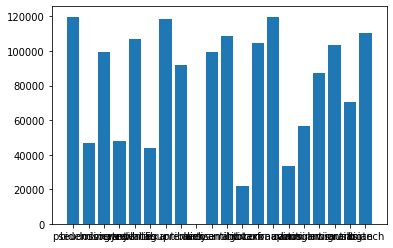

In [15]:
plt.bar(link_topic_count.columns, link_topic_count.iloc[0,:])

<AxesSubplot:title={'center':'Topic Occurrence Frequency Ratio, Non-truthful, Link-Domain Level'}, xlabel='Topics', ylabel='Frequency'>

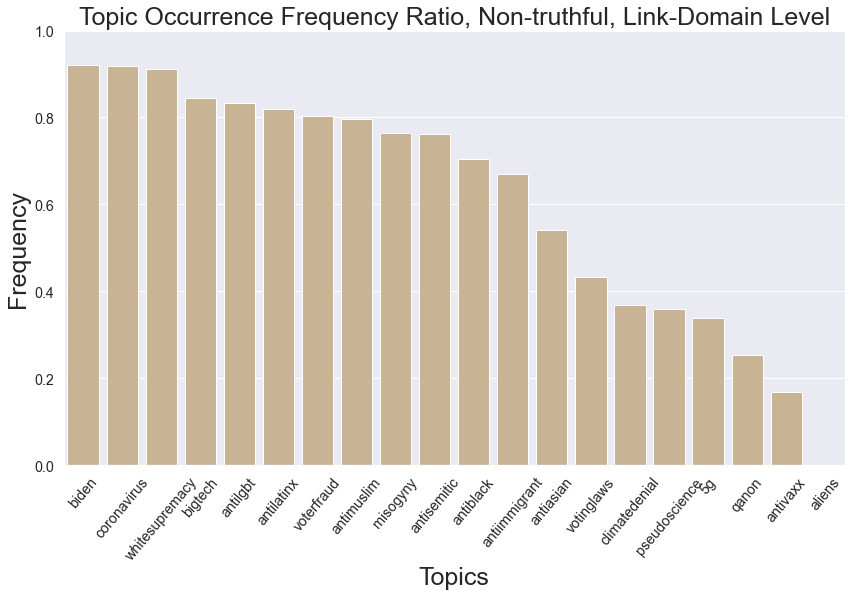

In [23]:
sns.set(rc = {'figure.figsize':(14,8)}, font_scale = 1.3)
grp_order = ratio.sort_values(['N'], ascending=False).reset_index(drop=True)['index']
ax = sns.barplot(x='index', y='N', 
            data=ratio, order=grp_order, color = 'tan')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set(ylim=(0, 1))
ax.set_xlabel('Topics', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
ax.set_title('Topic Occurrence Frequency Ratio, Non-truthful, Link-Domain Level', fontsize = 25)
ax

<AxesSubplot:title={'center':'Topic Occurrence Frequency Ratio, Repeat Offender, Link-Domain Level'}, xlabel='Topics', ylabel='Frequency'>

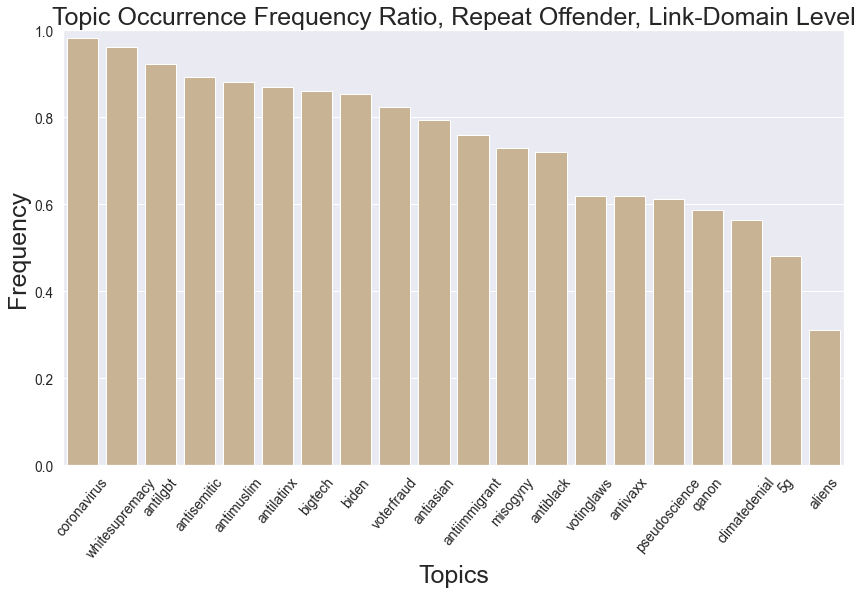

In [24]:
sns.set(rc = {'figure.figsize':(14,8)}, font_scale = 1.25)
grp_order = ratio.sort_values(['R'], ascending=False).reset_index(drop=True)['index']
ax = sns.barplot(x='index', y='R', 
            data=ratio, order=grp_order, color = 'tan')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set(ylim=(0, 1))
ax.set_xlabel('Topics', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
ax.set_title('Topic Occurrence Frequency Ratio, Repeat Offender, Link-Domain Level', fontsize = 25)
ax

<AxesSubplot:title={'center':'Topic Occurrence Frequency Ratio, Truthful, Link-Domain Level'}, xlabel='Topics', ylabel='Frequency'>

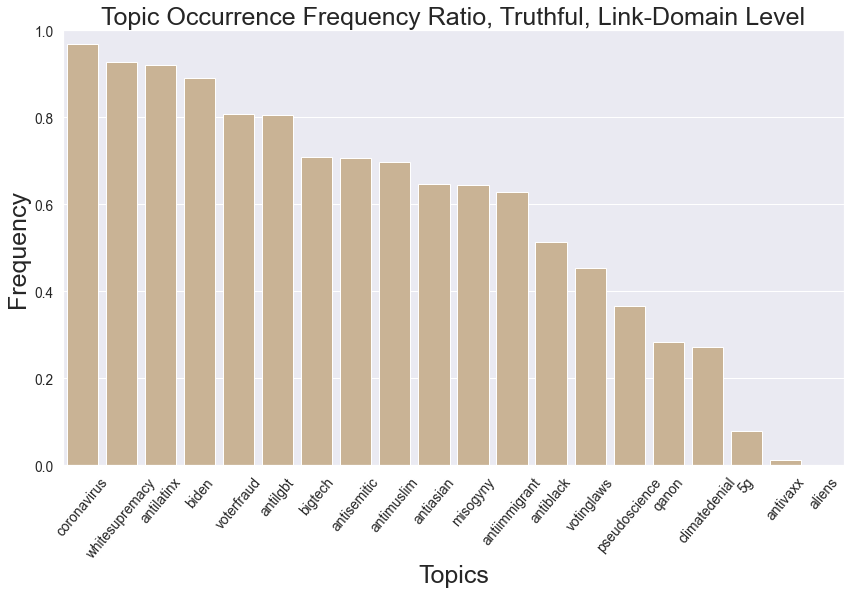

In [25]:
sns.set(rc = {'figure.figsize':(14,8)}, font_scale = 1.25)
grp_order = ratio.sort_values(['T'], ascending=False).reset_index(drop=True)['index']
ax = sns.barplot(x='index', y='T', 
            data=ratio, order=grp_order, color = 'tan')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set(ylim=(0, 1))
ax.set_xlabel('Topics', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
ax.set_title('Topic Occurrence Frequency Ratio, Truthful, Link-Domain Level', fontsize = 25)
ax

<Figure size 1008x576 with 0 Axes>

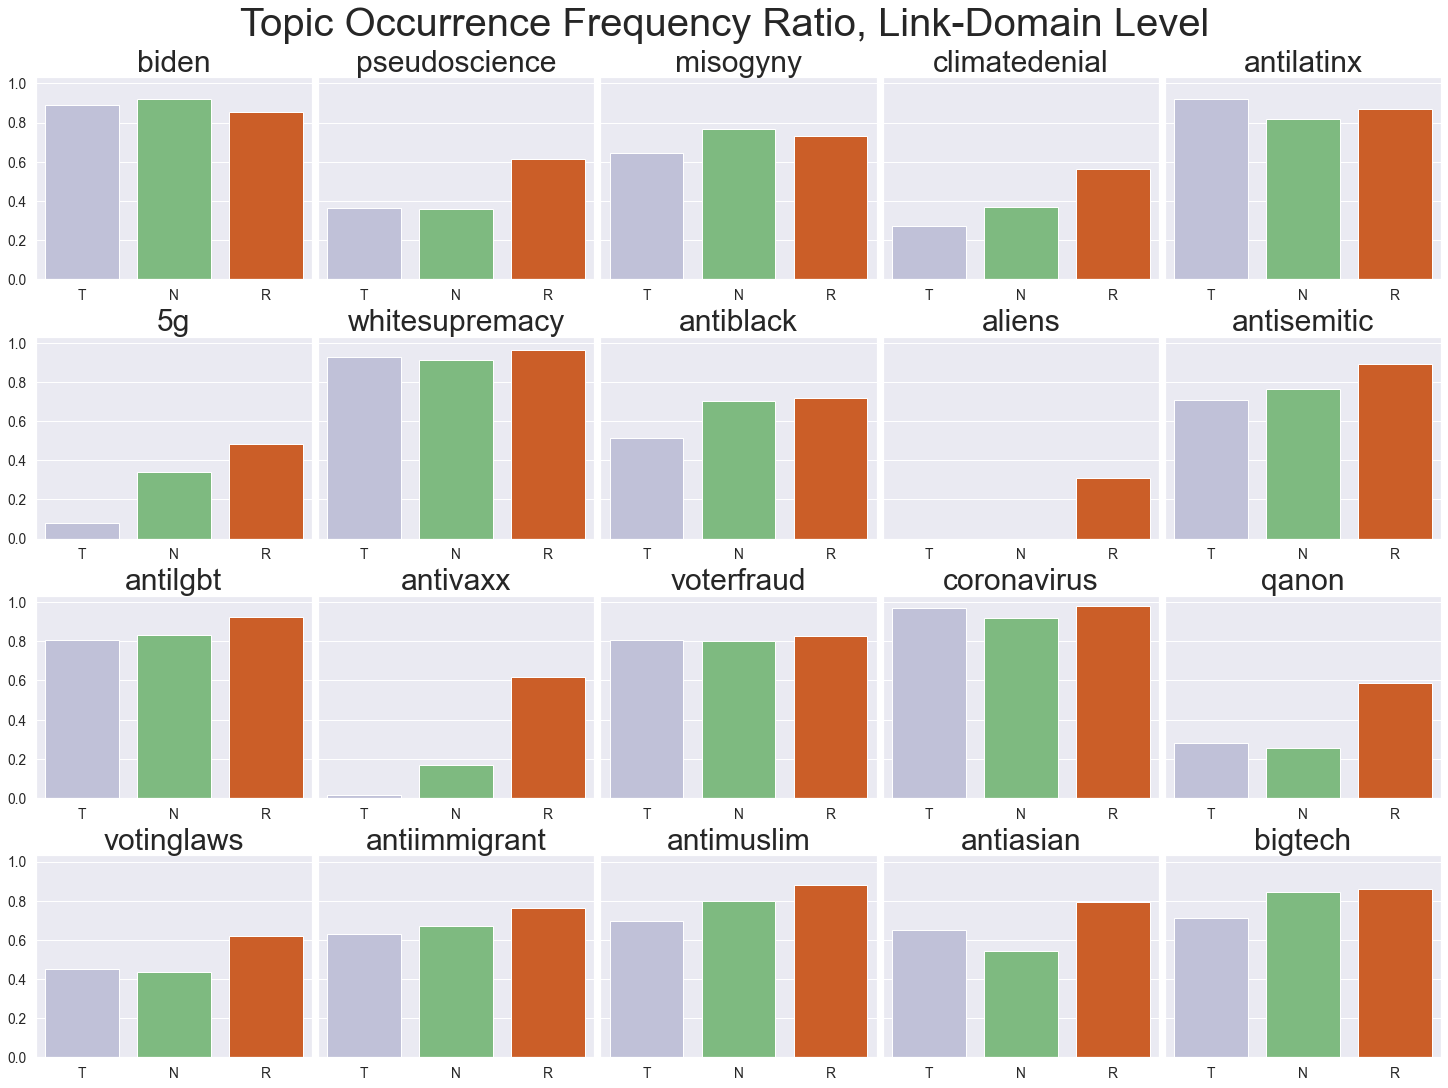

In [26]:
topics = ['biden', 'pseudoscience', 'misogyny', 'climatedenial','antilatinx', 
          '5g', 'whitesupremacy', 'antiblack', 'aliens','antisemitic', 'antilgbt', 
          'antivaxx', 'voterfraud', 'coronavirus','qanon', 'votinglaws', 'antiimmigrant', 
          'antimuslim', 'antiasian','bigtech']
plt.subplots_adjust(bottom = 0.5, top = 0.9)
fig, axes = plt.subplots(4, 5, figsize=(20, 15), sharey=True, constrained_layout=True)
fig.suptitle('Topic Occurrence Frequency Ratio, Link-Domain Level', fontsize=40)
for i in range(20):
    t = topics[i]
    sns.barplot(ax=axes[i//5, i%5], x='rating', y=t, 
                data=ratio_raw, order = ['T', 'N', 'R'], palette = 'tab20c_r')
    axes[i//5, i%5].set_title(t,fontsize=30)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

In [27]:
topic_data = pd.read_csv('topicDF.csv').iloc[:,1:]

In [28]:
topic_data

,domain,bigtech,5g,pseudoscience,antiblack,antiasian,antivaxx,antisemitic,antiimmigrant,biden,...,climatedenial,qanon,aliens,votinglaws,voterfraud,antimuslim,whitesupremacy,misogyny,antilgbt,antilatinx
0,westernjournal.com,1,0,1,1,1,0,1,1,1,...,1,1,0,1,1,1,1,1,1,1
1,theepochtimes.com,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,1,1,1,1
2,bongino.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,politicalflare.com,1,0,1,1,1,0,1,1,1,...,0,1,0,0,1,1,1,1,1,1
4,breitbart.com,1,1,1,1,1,0,1,1,1,...,1,1,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,activistmommy.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
259,wisemindhealthybody.com,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,worldhealth.net,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,healthy-holistic-living.com,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
sub_data_domain = data.loc[:,['rating','domain']]
topic_data_rating = topic_data.merge(sub_data_domain, on='domain',how='inner')\
                    .drop_duplicates().reset_index().iloc[:,1:]
topic_data_rating

,domain,bigtech,5g,pseudoscience,antiblack,antiasian,antivaxx,antisemitic,antiimmigrant,biden,...,qanon,aliens,votinglaws,voterfraud,antimuslim,whitesupremacy,misogyny,antilgbt,antilatinx,rating
0,westernjournal.com,1,0,1,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,1,T
1,theepochtimes.com,1,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,1,1,1,N
2,bongino.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,N
3,politicalflare.com,1,0,1,1,1,0,1,1,1,...,1,0,0,1,1,1,1,1,1,T
4,breitbart.com,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,1,1,1,1,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,activistmommy.com,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,T
259,wisemindhealthybody.com,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R
260,worldhealth.net,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R
261,healthy-holistic-living.com,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,R


In [30]:
domain_rating_topic_count = topic_data_rating.drop('domain',axis=1).groupby('rating').count()
domain_rating_topic_sum = topic_data_rating.drop('domain',axis=1).groupby('rating').sum()

In [31]:
domain_rating_topic_ratio = domain_rating_topic_sum/domain_rating_topic_count
domain_rating_topic_ratio = domain_rating_topic_ratio.reset_index()
domain_rating_topic_ratio

,rating,bigtech,5g,pseudoscience,antiblack,antiasian,antivaxx,antisemitic,antiimmigrant,biden,...,climatedenial,qanon,aliens,votinglaws,voterfraud,antimuslim,whitesupremacy,misogyny,antilgbt,antilatinx
0,N,0.528571,0.042857,0.114286,0.328571,0.314286,0.057143,0.442857,0.357143,0.857143,...,0.071429,0.071429,0.000000,0.171429,0.685714,0.514286,0.814286,0.342857,0.542857,0.514286
1,R,0.685484,0.282258,0.435484,0.427419,0.540323,0.403226,0.629032,0.362903,0.725806,...,0.201613,0.266129,0.040323,0.201613,0.629032,0.556452,0.733871,0.370968,0.604839,0.467742
2,T,0.536232,0.115942,0.144928,0.333333,0.333333,0.043478,0.579710,0.304348,0.840580,...,0.086957,0.130435,0.000000,0.173913,0.666667,0.550725,0.855072,0.376812,0.681159,0.579710


In [32]:
domain_rating_topic_ratio_T = domain_rating_topic_sum/domain_rating_topic_count
domain_rating_topic_ratio_T = domain_rating_topic_ratio_T.transpose()
domain_rating_topic_ratio_T = domain_rating_topic_ratio_T.reset_index()
domain_rating_topic_ratio_T

rating,index,N,R,T
0,bigtech,0.528571,0.685484,0.536232
1,5g,0.042857,0.282258,0.115942
2,pseudoscience,0.114286,0.435484,0.144928
3,antiblack,0.328571,0.427419,0.333333
4,antiasian,0.314286,0.540323,0.333333
5,antivaxx,0.057143,0.403226,0.043478
6,antisemitic,0.442857,0.629032,0.579710
7,antiimmigrant,0.357143,0.362903,0.304348
8,biden,0.857143,0.725806,0.840580
9,coronavirus,0.871429,0.830645,0.898551


<Figure size 1008x576 with 0 Axes>

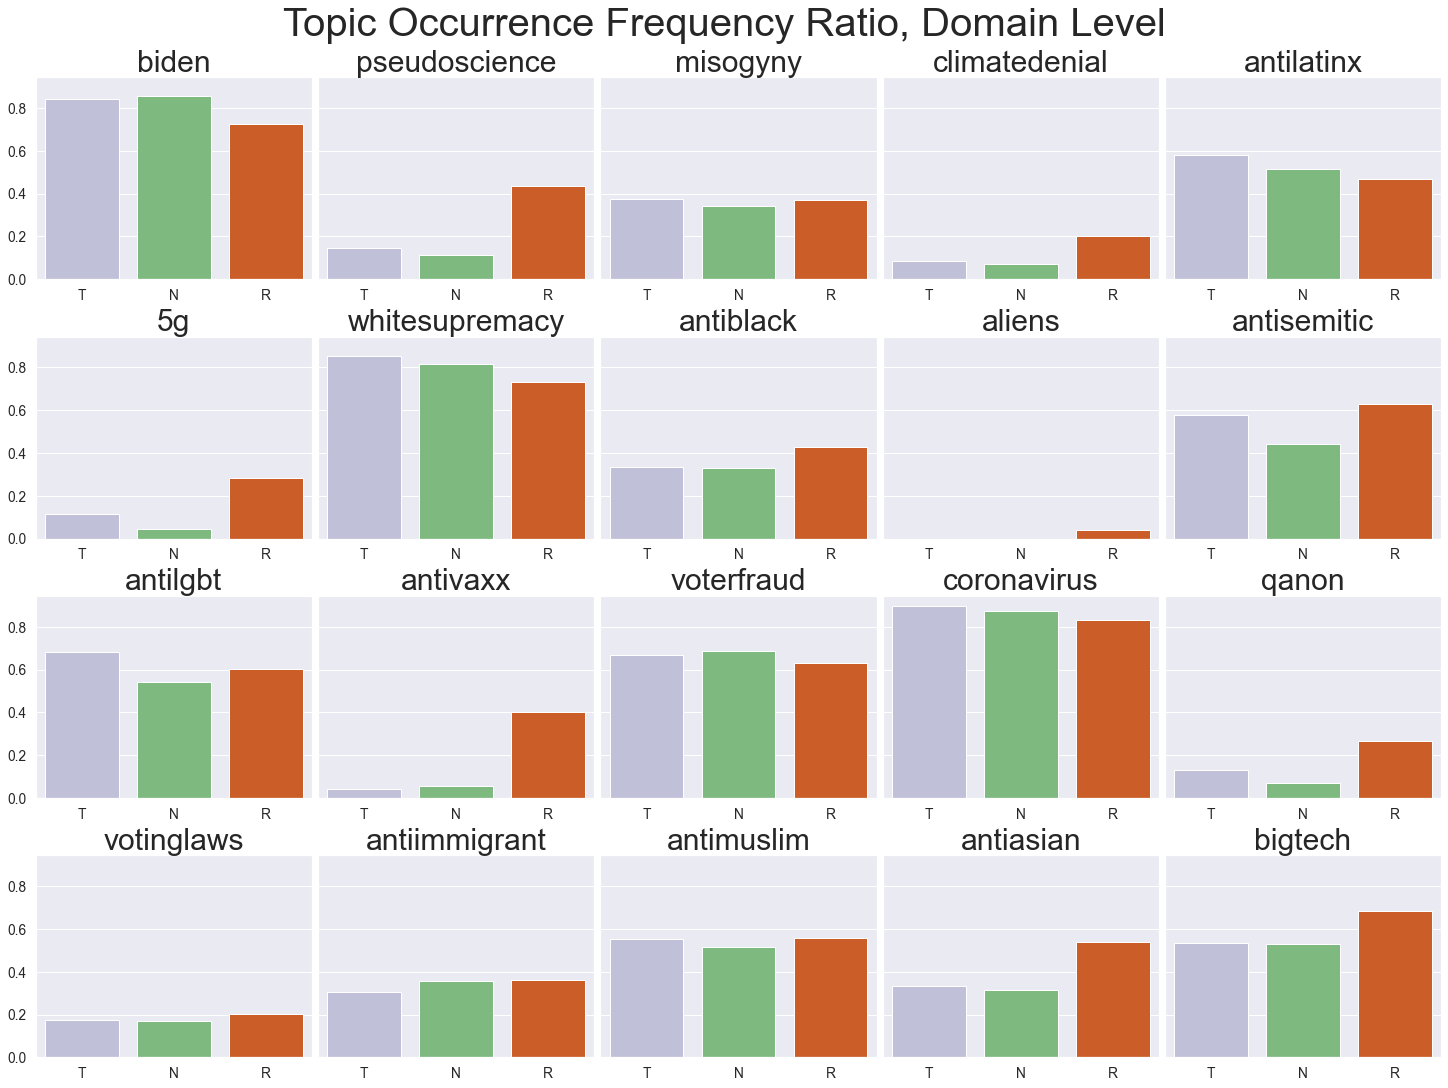

In [33]:
plt.subplots_adjust(bottom = 0.5, top = 0.9)
fig, axes = plt.subplots(4, 5, figsize=(20, 15), sharey=True, constrained_layout=True)
fig.suptitle('Topic Occurrence Frequency Ratio, Domain Level', fontsize=40)
for i in range(20):
    t = topics[i]
    sns.barplot(ax=axes[i//5, i%5], x='rating', y=t, 
                data=domain_rating_topic_ratio, order = ['T', 'N', 'R'], palette = 'tab20c_r')
    axes[i//5, i%5].set_title(t,fontsize=30)
    axes[i//5, i%5].set_xlabel('')
    axes[i//5, i%5].set_ylabel('')

<AxesSubplot:title={'center':'Topic Occurrence Frequency Ratio, Non-truthful, Domain Level'}, xlabel='Topics', ylabel='Frequency'>

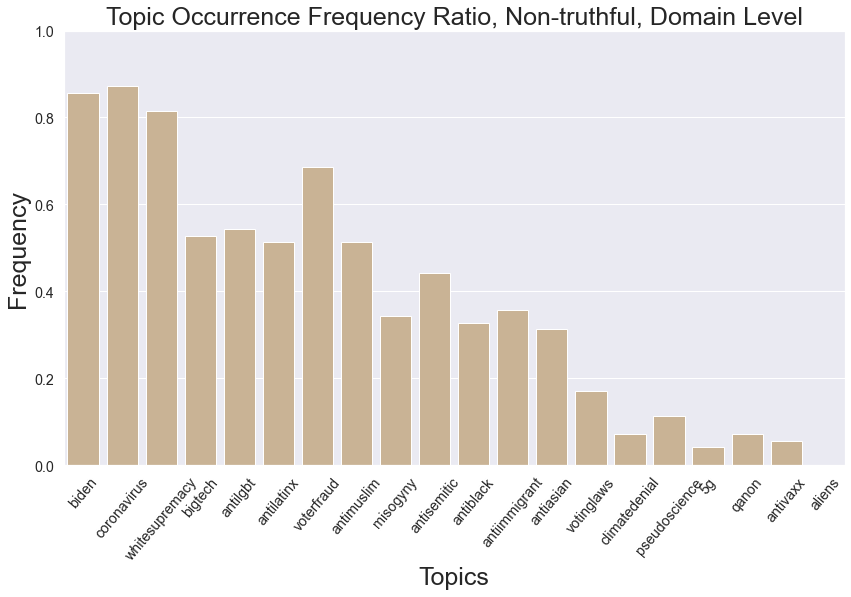

In [34]:
sns.set(rc = {'figure.figsize':(14,8)}, font_scale = 1.3)
#grp_order = domain_rating_topic_ratio_T.sort_values(['N'], ascending=False).reset_index(drop=True)['index']
grp_order = ratio.sort_values(['N'], ascending=False).reset_index(drop=True)['index']
ax = sns.barplot(x='index', y='N', 
            data=domain_rating_topic_ratio_T, order=grp_order, color = 'tan')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set(ylim=(0, 1))
ax.set_xlabel('Topics', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
ax.set_title('Topic Occurrence Frequency Ratio, Non-truthful, Domain Level', fontsize = 25)
ax

<AxesSubplot:title={'center':'Topic Occurrence Frequency Ratio, Repeat Offender, Domain Level'}, xlabel='Topics', ylabel='Frequency'>

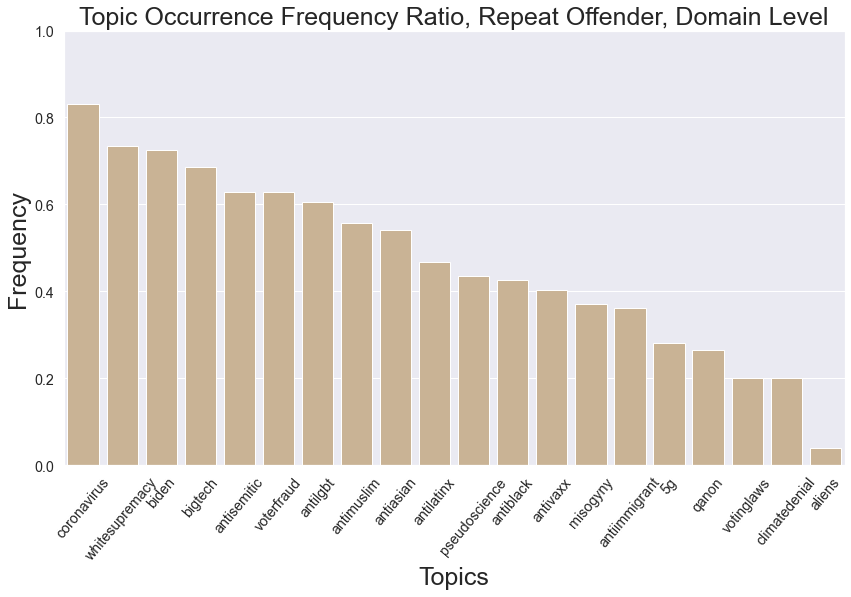

In [37]:
sns.set(rc = {'figure.figsize':(14,8)}, font_scale = 1.3)
grp_order = domain_rating_topic_ratio_T.sort_values(['R'], ascending=False).reset_index(drop=True)['index']
#grp_order = ratio.sort_values(['R'], ascending=False).reset_index(drop=True)['index']

ax = sns.barplot(x='index', y='R', 
            data=domain_rating_topic_ratio_T, order=grp_order, color = 'tan')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set(ylim=(0, 1))
ax.set_xlabel('Topics', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
ax.set_title('Topic Occurrence Frequency Ratio, Repeat Offender, Domain Level', fontsize = 25)
ax

<AxesSubplot:title={'center':'Topic Occurrence Frequency Ratio, Truthful, Domain Level'}, xlabel='Topics', ylabel='Frequency'>

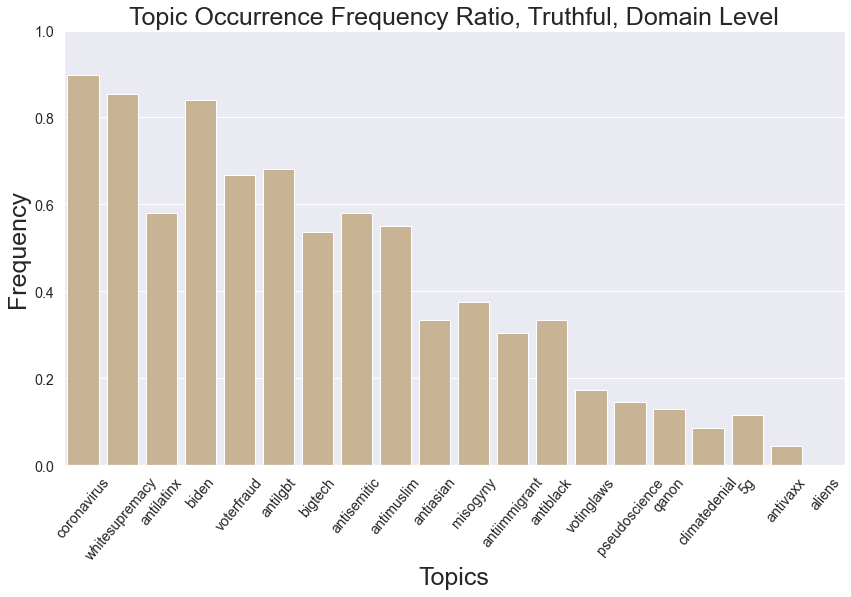

In [36]:
sns.set(rc = {'figure.figsize':(14,8)}, font_scale = 1.3)
#grp_order = domain_rating_topic_ratio_T.sort_values(['T'], ascending=False).reset_index(drop=True)['index']
grp_order = ratio.sort_values(['T'], ascending=False).reset_index(drop=True)['index']

ax = sns.barplot(x='index', y='T', 
            data=domain_rating_topic_ratio_T, order=grp_order, color = 'tan')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 50)
ax.set(ylim=(0, 1))
ax.set_xlabel('Topics', fontsize = 25)
ax.set_ylabel('Frequency', fontsize = 25)
ax.set_title('Topic Occurrence Frequency Ratio, Truthful, Domain Level', fontsize = 25)
ax